# Individual Planning Report

## Data Description

In this project, we are working with two files: `players.csv` and `sessions.csv`. These files contain information about players and their gameplay activity for the Minecraft server! This data was gathered by a research group that set up a MineCraft server and recorded players' actions as they navigated through the world.  

1. `players.csv` <br>
This file provides information for each player. The data includes **196 players** and **7 variables**, including:

- `experience` - The player’s gaming experience: pro, amateur, veteran _(chr)_
- `subscribe` - Indicates if the player has a subscription: TRUE or FALSE _(lgl)_
- `hashedEmail` - The player's encrypted email address _(chr)_
- `played_hours` - Total hours the player has spent in the game _(dbl)_
- `name` - The player’s name _(chr)_
- `gender` - The player’s gender _(chr)_
- `Age` - The player’s age in years _(dbl)_

2. `sessions.csv` <br>
This file provides information on the players' game sessions. The data includes **1535 sessions** and **5 variables**, including:

- `hashedEmail` - The player's encrypted email address _(chr)_
- `start_time` - The timestamp of when the session started in the format DD/MM/YYYY HH:mm _(chr)_
- `end_time` - The timestamp of when the session ended in the format DD/MM/YYYY HH:mm _(chr)_
- `original_start_time` - The Unix timestamp of when the session started, which is milliseconds since January 1, 1970 _(dbl)_
- `original_end_time` - The Unix timestamp of when the session ended _(dbl)_
 

## Questions

For this project, I took interest in the broad question: <br>
*We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.*

but more specifically, I wanted to investigate: 
#### Can a player’s experience and age predict average playtime per session?

The dataset contains detailed information on both player characteristics (explanatory variables) and their session duration (response variable), which together can be used to predict which types of players contribute the most gameplay data. Although the information is in two separate files, each game session can be linked through the common `hashedEmail` variable! So, I can calculate each session by subtracting the end time and start time (Unix), find the mean session duration for each player by `hashedEmail`, then merge the summary with the player information.

## Summary Statistics

This section presents summary statistics for all variables to provide insight into the general makeup of the dataset and highlight any potential biases that may affect our predictions. The dataset is already in a tidy format, where each row represents a unique observation and each column represents a single variable. However, we can rearrange the columns in `players.csv` so that they are in a more logical order.

In [2]:
## load libraries
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [36]:
## load player data
player_data <- read_csv("data/players.csv") |>
    select(name, Age, gender, experience, hashedEmail, subscribe, played_hours) # rearrange columns in more logical order 
player_data

## load session data
session_data <- read_csv("data/sessions.csv")
session_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,Age,gender,experience,hashedEmail,subscribe,played_hours
<chr>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<dbl>
Morgan,9,Male,Pro,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,TRUE,30.3
Christian,17,Male,Veteran,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,TRUE,3.8
Blake,17,Male,Veteran,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,FALSE,0.0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Dylan,57,Prefer not to say,Amateur,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,FALSE,0.0
Harlow,17,Male,Amateur,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,FALSE,2.3
Ahmed,NA,Other,Pro,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,TRUE,0.2


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


#### `experience` statistics

In [4]:
## number of pro players
pros <- player_data |>
    filter(experience == "Pro") |>
    nrow()

print(paste("There are", pros, "pro players"))

## number of veteran players
veterans <- player_data |>
    filter(experience == "Veteran") |>
    nrow()

print(paste("There are", veterans, "veteran players"))

## number of pro players
amateurs <- player_data |>
    filter(experience == "Amateur") |>
    nrow()

print(paste("There are", amateurs, "amateur players"))

## number of regular players
regulars <- player_data |>
    filter(experience == "Regular") |>
    nrow()

print(paste("There are", regulars, "regular players"))

## number of beginner players
beginners <- player_data |>
    filter(experience == "Beginner") |>
    nrow()

print(paste("There are", beginners, "beginner players"))

## percentage of players that are amateur
amateur_percentage <- round((amateurs / 196), digits = 2) * 100
print(paste(amateur_percentage, "% of players are amateurs"))

[1] "There are 14 pro players"
[1] "There are 48 veteran players"
[1] "There are 63 amateur players"
[1] "There are 36 regular players"
[1] "There are 35 beginner players"
[1] "32 % of players are amateurs"


Most players are amateurs or veterans, which may cause predictions to reflect their playtime patterns more strongly while underrepresenting insights for other groups, like pro players.

#### `subscribe` statistics


In [5]:
## number of players that are subscribed
subscribed <- player_data |>
    filter(subscribe == TRUE) |>
    nrow()

print(paste(subscribed, "players are subscribed"))

## number of players that are not subscribed
not_subscribed <- player_data |>
    filter(subscribe == FALSE) |>
    nrow()

print(paste(not_subscribed, "players are not subscribed"))

## percentage of players that are subscribed
subscription_percentage <- round((subscribed / 196), digits = 2) * 100
print(paste(subscription_percentage, "% of players are subscribed"))

## percentage of players that are not subscribed
non_subscription_percentage <- round((not_subscribed / 196), digits = 2) * 100
print(paste(non_subscription_percentage, "% of players are not subscribed"))

[1] "144 players are subscribed"
[1] "52 players are not subscribed"
[1] "73 % of players are subscribed"
[1] "27 % of players are not subscribed"


#### `played_hours` statistics

In [38]:
## mean play time for all sessions
avg_playtime <- player_data |>
    summarize(avg_playtime = round((mean(played_hours, na.rm = TRUE)), digits = 2))

avg_playtime  

## max play time for all sessions
max_playtime <- player_data |>
    summarize(max_playtime = round((max(played_hours, na.rm = TRUE)), digits = 2))

max_playtime  

avg_playtime
<dbl>
5.85


max_playtime
<dbl>
223.1


#### `gender` statistics

In [7]:
## number of male players
number_males <- player_data |>
    filter(gender == "Male") |>
    nrow()
print(paste("There are", number_males, "male players."))

## number of female players
number_females <- player_data |>
    filter(gender == "Female") |>
    nrow()
print(paste("There are", number_females, "female players."))

## number of other gender players
number_other <- player_data |>
    filter(gender != "Male", gender != "Female") |>
    nrow()
print(paste("There are", number_other, "players that are neither male nor female."))

[1] "There are 124 male players."
[1] "There are 37 female players."
[1] "There are 35 players that are neither male nor female."


#### `Age` Statistics

In [44]:
## find mean age of players
avg_age <- player_data |>
    summarize(avg_age = round((mean(Age, na.rm = TRUE)), digits = 2))

avg_age

## find max age of players
max_age <- player_data |>
    summarize(max_age = max(Age, na.rm = TRUE))
max_age

## find min age of players
min_age <- player_data |>
    summarize(min_age = min(Age, na.rm = TRUE))
min_age

avg_age
<dbl>
21.14


max_age
<dbl>
58


min_age
<dbl>
9


#### `original_start_time` and `original_end_time` statistics

In [ ]:
## add session duration column
sessions_with_playtime <- session_data |>
    filter(!is.na(original_end_time)) |>
    mutate(session_duration = (original_end_time - original_start_time) / 60000)

## mean start time 
avg_start <- sessions_with_playtime |>
    summarize(avg_start = round(mean(original_start_time), digits = 2))

avg_start

## mean end time 
avg_end <- sessions_with_playtime |>
    summarize(avg_end = round(mean(original_end_time), digits = 2))

avg_end

## mean session duration in minutes
avg_playtime <- sessions_with_playtime |>
    summarize(avg_playtime = round(mean(session_duration), digits = 2))

avg_playtime

## max session duration
max_playtime <- sessions_with_playtime |>
    summarize(max_playtime = round(max(session_duration), digits = 2))

max_playtime

## Exploratory Data Analysis and Visualization

This section uses data visualizations to uncover patterns and insights, helping us better understand the factors affecting playtime and highlighting potential issues in the data that could influence the results.

Warning message in scale_y_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


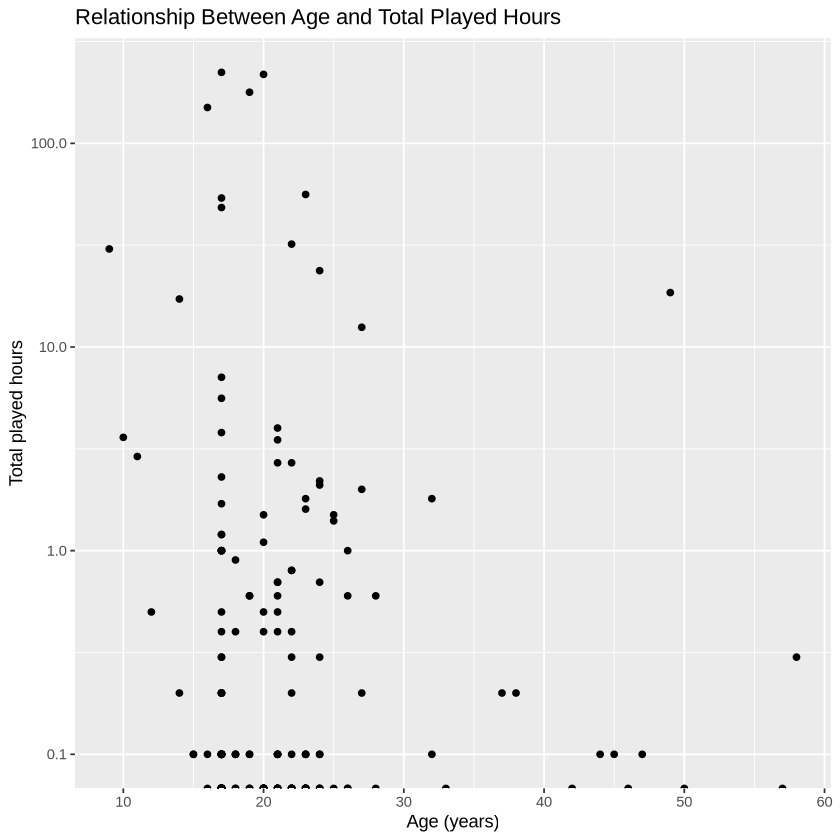

In [56]:
## relationship between player age and total hours played
exp_vs_hours_played <- player_data |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point() +
    scale_y_log10(labels = label_comma()) +
    labs(title = "Relationship Between Age and Total Played Hours", x = "Age (years)", y = "Total played hours")

exp_vs_hours_played

From this plot, we see that most players are 15–25 and contribute the most hours, suggesting age may be a strong predictor for playtime. However, this would depend on whether the players joined the server at the same time, which is why I am more interested in individual session duration!

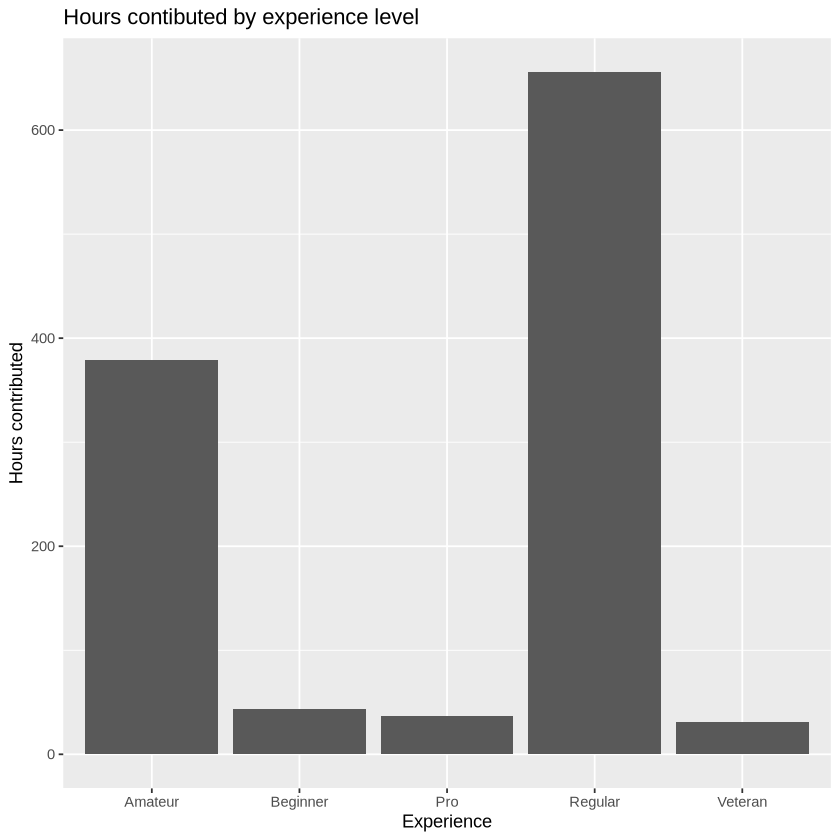

In [23]:
## hours contributed by each experience level
hrs_per_exp <- player_data |>
    ggplot(aes(x = experience, y = played_hours)) +
    geom_bar(stat="identity") +
    labs(title = "Hours contibuted by experience level", x = "Experience", y = "Hours contributed")

hrs_per_exp

Here, we see that although there are only around half as many regular players as there are amateurs in the dataset, regulars contribute nearly double the playtime. Additionally, while veterans make up a large portion of the demographic, they contribute very little, showing that more experience doesn’t mean more playtime.

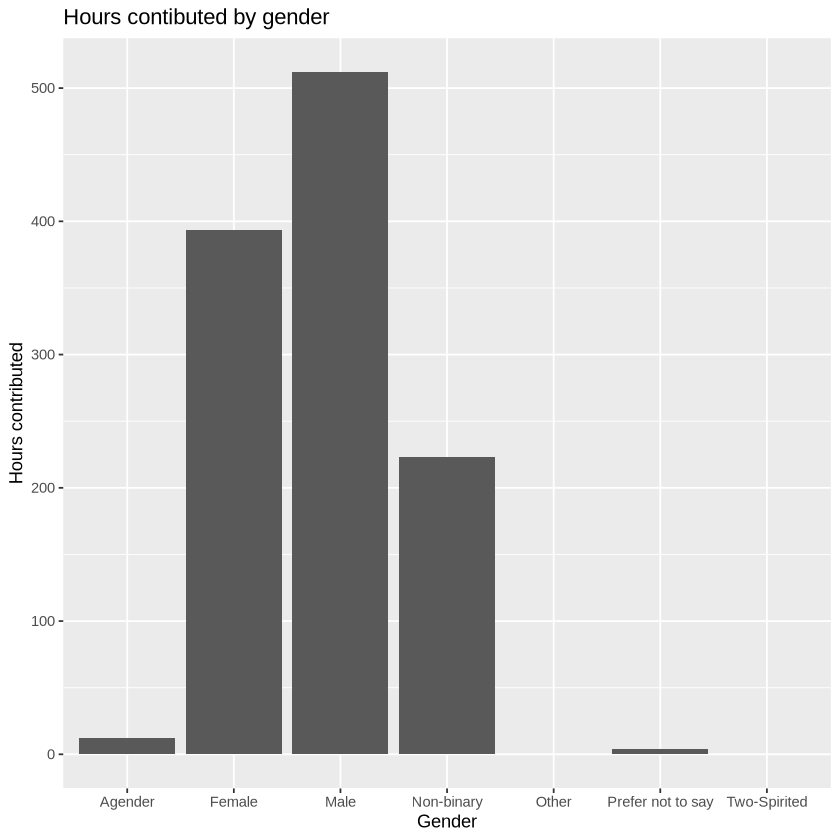

In [12]:
## hours contributed by gender
hrs_per_exp <- player_data |>
    ggplot(aes(x = gender, y = played_hours)) +
    geom_bar(stat = "identity") +
    labs(title = "Hours contibuted by gender", x = "Gender", y = "Hours contributed")

hrs_per_exp

Interestingly enough, we see that although male players dominate the demographic, female players contribute 80% of their playtime, and non-binary players contribute nearly half, showing that smaller groups can still contribute a significant amount of data despite being underrepresented.

In [ ]:
## hours contributed by subscription status
hrs_by_s <- ggplot(player_data, aes(x = subscribe, y = played_hours, fill = gender)) +
  geom_bar(stat = "identity") +
  labs(title = "Hours contributed by subscription status",
       x = "Subscribed?", y = "Hours played")

hrs_by_sub

The plot shows that non-subscribed players contribute very little, while male and female subscribers contribute roughly the same hours, and non-binary subscribers contribute about half as much. This suggests subscription status strongly influences playtime and may be worth including in my question!

## Methods and Plan

To predict session duration, I will use KNN regression since I'm working with a quantitative response variable. While linear regression could also be considered, KNN is more appropriate for this problem because it can capture non-linear patterns without assuming a linear relationship between predictors and response. However, KNN may perform poorly when data is sparse, like for older players, as it relies on finding nearby observations to make predictions.
<br> <br>
Since experience is categorical, I'll convert it to numeric values (beginner = 1, intermediate = 2, etc.). This is a limitation because it assumes equal spacing between levels, which might not be accurate. For example, the gap between beginner and regular could differ from veteran to pro.
<br> <br>
For data processing, I'll split the data into 80% training and 20% testing before any modeling. To select the optimal k value for KNN, I'll use 5-fold cross-validation on the training set. I'll test several k values and choose the one with the lowest average RMSPE across folds. Once the optimal k is determined, I'll train the final KNN model on the full training set and evaluate its performance on the test set using RMSPE.
